# Demo
Compare the performance of several models 

In [1]:
# load notebook modifiers 
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
# import file 
from train_test import * 

## 0. Load data 

In [3]:
# reading in the data
X, Y = load_preprocess_data()

# sequential split 
X_train_complete, X_test_complete, Y_train, Y_test = \
            train_test_split(X, Y, shuffle=False)

# PCA
pca = PCA(n_components=20)
pca.fit(X_train_complete)
X_train = pca.transform(X_train_complete)
X_test = pca.transform(X_test_complete)

Loading Data ...
Finish Loading


In [4]:
# print the distribution of labels 
pd.Series(Y_train).value_counts(normalize=True)

1.0    0.429929
0.0    0.286192
2.0    0.283879
dtype: float64

## 1. Model Exploration
We mainly compare gradient boosting with XGBoost 

In [5]:
# dump file content
with open(os.path.join(report_path, 'accuracy.txt'), 'w') as f:
    f.write('')

In [6]:
# logistic regression (TOO BAD)
# train_test_lg(X_train, X_test, Y_train, Y_test)

In [7]:
# SVC (TOO BAD)
# train_test_svc(X_train, X_test, Y_train, Y_test)

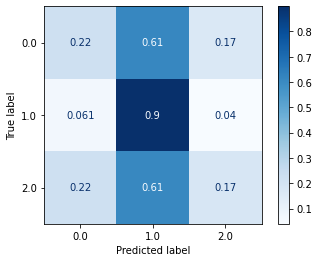

In [8]:
# gradient boosting (DECENT)
train_test_boosting(X_train, X_test, Y_train, Y_test)

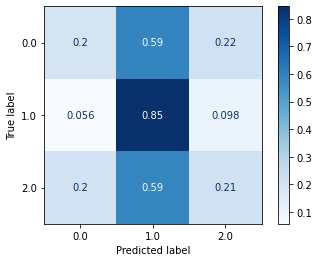

In [9]:
# XGBOOST (DECENT)
train_test_xgb(X_train, X_test, Y_train, Y_test)

## 2. Trading 
The trading rules are outlined in naive_trading.py

The following are currently NOT RUNNABLE

In [10]:
# load file
# from naive_trading import * 

In [11]:
# start trading 
# raw_data = load_data()  # from preprocess 
# direction = train_assign_direction(raw_data)  # obtain directions 
# cum_ret, guided_cum_ret = trade(raw_data, direction)  # trade 

# Debug Space 